## Ask
### Preguntas guía
- ¿Cuáles temas estas explorando?
- ¿Cual es el problema que tratas de resolver?
- ¿Cuáles metricas usarás para medir los datos para alcanzar el objetivo?
- ¿Quienes son los _stakeholders_?
- ¿Quién es tu audiencia?
- ¿Como tus conocimientos pueden ayudar al cliente a tomar una decisión?
### Tareas Clave
- Identificar la tarea empresarial 
- Determinar los _stakeholders_ clave
- Seleccionar un _dataset_
- Establecer metricas
### Entregables

Se está analizando el rendimiento académico de los estudiantes, considerando factores como su historial de calificaciones, carrera, género, su preparatoria de origen, su municipio, etc., con el fin de identificar a estudiantes que podrían estar en riesgo de deserción académica y antes de que ocurra, estos puedan recibir apoyo de forma oportuna. Las métricas por usarse serán el promedio de calificaciones por alumno, porcentaje de materias aprobadas, años y periodos de ingreso/término y el estado del alumno (vigente o no). Los stakeholders clave y posibles interesados en este análisis son las autoridades escolares como tutores académicos, responsables de programas de apoyo estudiantil, directivos escolares, coordinadores de carrera y personal de orientación académica. 
Nuestros conocimientos en análisis de datos y modelos predictivos pueden ayudar a identificar a tiempo a estudiantes en riesgo, permitiendo a las autoridades escolares implementar estrategias de apoyo específicas que mejoren el desempeño académico general. La ventana de observación será de 2 semestres y la de predicción de 2 semestres.



## Prepare
### Preguntas guía 
- ¿Dónde se encuentran tus datos?
- ¿Como están organizados?
- ¿Hay algún problema de sesgo o credibilidad en tus datos ?
- ¿Como manejas el tema de la licencia de uso, privacidad, seguridad y accesibilidad ? 
- ¿Como verificaste la integridad de los datos?
- ¿Como te ayuda a responder tu pregunta ? 
- ¿Hay algún problema con los datos ?
### Tareas clave 
- Descargar los datos y almacenarlos en forma apropiada
- Identificar como están organizados
- Ordenar y filtrar los datos 
- Determinar la credibilidad de los datos
### Entregables
Los datos fueron proporcionados en archivos CSV (calificaciones.csv, estudiantes.csv, carrera.csv y escuelas.csv), los cuales se encuentran almacenados localmente y organizados dentro del proyecto. 
#### calificaciones.csv: 
Contiene el periodo, la clave del alumno, clave de las materias cursadas, calificación (debe ser <70 para ser aprobatoria> y tipo de calificación (1= ordinario, 2=recuperación, 3=extraordinario, 4=calificación ordinaria del curso RC y 5=recuperación del curso RC)).
#### estudiantes.csv: 
Registra la matrícula de los estudiantes, la de la carrera a la que pertenece, sexo, clave de su preparatoria de origen, su dirección (colonia, municipio y ciudad), año en que ingreso a la carrera, periodo en que termino (siendo 1=enero-junio, 2=verano o 3=agosto-diciembre) y su causa de salida (1=vigente, 2=baja temporal, 3=baja por especial/reprobado, 4=baja definitiva o 5=egresado).
#### carrera.csv: 
Contiene la información general sobre las carreras, siendo la clave de estas, nombre completo y nombre corto.
#### escuelas.csv: 
Contiene información detallada sobre las escuelas de origen (bachillerato) de los estudiantes, siendo simplemente la clave de la preparatoria y su nombre.

Cada archivo representa una entidad: alumnos, carreras, escuelas, calificaciones, integrados usando claves en común. Algunos datos como valores nulos y calificaciones fuera del rango pueden afectar la integridad de los datos, por lo que verificamos los nulos y los valores fuera del rango (<0 o >100).




In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("./calificaciones.csv")
carrera = pd.read_csv("./carrera.csv")
escuelas = pd.read_csv("./escuelas.csv")
estudiantes = pd.read_csv("./estudiantes.csv")

data['alumno'] = data['clave_alumno']

estudiantes.set_index('clave_alumno', inplace=True)
data = estudiantes.join(data.set_index('clave_alumno'))

carrera.set_index('clave_carrera', inplace=True)
carrera = carrera.rename(columns={'nombre': 'carrera'})
data = carrera.join(data.set_index('clave_carrera'))


data.set_index('prepa', inplace=True)
escuelas.set_index('clave', inplace=True)
data = data.join(escuelas)

data['clave_alumno'] = data['alumno']
data.set_index('clave_alumno', inplace=True)

data = data.rename(columns={'clave_materia': 'materia'})

data.head(150)

,carrera,corto,sexo,colonia,municipio,ciudad,ingreso,termino,causa_salida,periodo,materia,calificacion,tipo_calificacion,alumno,escuela
clave_alumno,,,,,,,,,,,,,,,
1.0,INGENIERIA INDUSTRIAL,Industrial,1,Villa de Guadalupe,25006.0,CULIACAN,2003.0,2011.0,4,2003.0,04tGt4,100.0,1.0,1.0,COBAES 39(PROFR. JOSE ROMERO )
1.0,INGENIERIA INDUSTRIAL,Industrial,1,Villa de Guadalupe,25006.0,CULIACAN,2003.0,2011.0,4,2003.0,04tBt2,85.0,1.0,1.0,COBAES 39(PROFR. JOSE ROMERO )
1.0,INGENIERIA INDUSTRIAL,Industrial,1,Villa de Guadalupe,25006.0,CULIACAN,2003.0,2011.0,4,2003.0,04tBt1,85.0,1.0,1.0,COBAES 39(PROFR. JOSE ROMERO )
1.0,INGENIERIA INDUSTRIAL,Industrial,1,Villa de Guadalupe,25006.0,CULIACAN,2003.0,2011.0,4,2003.0,04tGt5,0.0,3.0,1.0,COBAES 39(PROFR. JOSE ROMERO )
1.0,INGENIERIA INDUSTRIAL,Industrial,1,Villa de Guadalupe,25006.0,CULIACAN,2003.0,2011.0,4,2011.0,04tAt3,0.0,3.0,1.0,COBAES 39(PROFR. JOSE ROMERO )
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.0,INGENIERIA INDUSTRIAL,Industrial,2,El Walamo,25006.0,CUALIACAN,2003.0,2061.0,4,2061.0,04tFt9,90.0,1.0,4.0,COBAES 36(JOSE C.VALADEZ ROCH)
4.0,INGENIERIA INDUSTRIAL,Industrial,2,El Walamo,25006.0,CUALIACAN,2003.0,2061.0,4,2061.0,04tGt2,70.0,5.0,4.0,COBAES 36(JOSE C.VALADEZ ROCH)
4.0,INGENIERIA INDUSTRIAL,Industrial,2,El Walamo,25006.0,CUALIACAN,2003.0,2061.0,4,2061.0,04tGt3,90.0,1.0,4.0,COBAES 36(JOSE C.VALADEZ ROCH)


## Process
### Preguntas guía 
- ¿Que herramientas has escogido y por qué ? 
- ¿Te has asegurado de la integridad de tus datos?
- Que pasos has tomado para asegurarte que tus datos están limpios?
- ¿Como puedes verificar que tus datos están limpios y listos para analizar?
- Has documentado tu proceso de limpieza de tal forma que puedes ser revisados y compartidos esos resultados ? 
### Tareas clave 
- Escoger tus herramientas 
- Transformar tus datos de tal forma que puedas trabajar con ellos en forma efectiva
- Documentar el proceso de limpieza
### Entregables
- Documentación de cualquier tipo de limpieza y manipulación de datos




In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Verificar valores nulos en el dataset
nulos = data.isnull().sum()

# Verificar valores fuera del rango permitido (0-100)
fuera_rango = data[(data['calificacion'] < 0) | (data['calificacion'] > 100)]

# Crear una columna binaria para indicar si la materia fue aprobada (calificación >= 70)
data['aprobado'] = data['calificacion'] >= 70

# Calcular el promedio de calificaciones por estudiante
promedios_por_alumno = data.groupby('clave_alumno')['calificacion'].mean().reset_index()
promedios_por_alumno.rename(columns={'calificacion': 'promedio_calificaciones'}, inplace=True)

# Calcular el porcentaje de materias aprobadas por estudiante
aprobadas_por_alumno = data.groupby('clave_alumno')['aprobado'].mean().reset_index()
aprobadas_por_alumno.rename(columns={'aprobado': 'porcentaje_aprobadas'}, inplace=True)

data = data.merge(promedios_por_alumno, on='clave_alumno')
data = data.merge(aprobadas_por_alumno, on='clave_alumno')

metricas_por_alumno = data[['clave_alumno', 'promedio_calificaciones', 'porcentaje_aprobadas','carrera', 'ingreso','termino']].drop_duplicates()
# Mapeo de períodos
periodo_mapping = {
        '1': 'Ene-Jun',
        '2': 'Verano',
        '3': 'Ago-Dic'
}

metricas_por_alumno['año_ingreso'] = (
    metricas_por_alumno['ingreso']
    .dropna()
    .astype(int)
    .astype(str)
    .str[1:3]
    .apply(lambda x: f"20{x}")
)

metricas_por_alumno['tipo_periodo_ingreso'] = (
    metricas_por_alumno['ingreso']
    .dropna()
    .astype(int)
    .astype(str)
    .str[3]
    .map(periodo_mapping)
)

metricas_por_alumno['año_termino'] = (
    metricas_por_alumno['termino']
    .dropna()
    .astype(int)
    .astype(str)
    .str[1:3]
    .apply(lambda x: f"20{x}")
)

metricas_por_alumno['tipo_periodo_termino'] = (
    metricas_por_alumno['termino']
    .dropna()
    .astype(int)
    .astype(str)
    .str[3]
    .map(periodo_mapping)
)

metricas_por_alumno['vigente'] = metricas_por_alumno['termino'].apply(lambda x: 'Sí' if pd.isna(x) else 'No')

metricas_por_alumno.drop(columns=['ingreso', 'termino'], inplace=True)



In [5]:
# Eliminar el sufijo ".0" para entero
data['periodo'] = data['periodo'].astype(str).str.replace('.0', '', regex=False).str.strip().astype(int)
# Campo 'periodo' en formato entero
data['periodo'] = data['periodo'].astype(str).str.strip().astype(int)

# Calcular el historial académico por alumno y periodo
historial = data.groupby(['clave_alumno', 'periodo']).agg({
    'calificacion': ['mean', 'count', lambda x: (x < 70).sum()]
}).reset_index()

# Renombrar columnas
historial.columns = ['clave_alumno', 'periodo', 'promedio_semestre', 'materias_cursadas', 'materias_reprobadas']

## Analyze

### Preguntas guía 
- ¿Cómo debes organizar tus datos para llevar a cabo su análisis
- ¿Están tus datos debidamentes formateados?
- ¿Que sorpresas has encontrado en los datos?
- ¿Cuáles tendencias o relaciones has encontrado en los datos?
- ¿Como te ayudan estos descubrimientos a responder las preguntas empresariales?

### Tareas clave 
- Agregar y resumir tus datos para que sean útiles y accesibles
- Organizar y formatear tus datos
- Realizar calculos
- Documentar tus cálculos para darle seguimiento a tus pasos de análisis
- Identificar tendencias y relaciones 
- Modelado

### Entregables
- Un resumen de tu análisis

### Pasos a seguir
- Importar los datos
- Hacer las columnas consistentes y únalas en un solo dataframe
- Limpie y resuma sus datos para analizar
- Realice un analisis descriptivo
- Exportar un archivo de resumen (csv) para análisis posterior
- Modelado
- Comparación y optimización de modelos
- Validación y prueba


In [18]:
#Ventanas de observación
ventanas = []

for alumno, grupo in historial.groupby('clave_alumno'):
    grupo = grupo.sort_values('periodo')

    # 4 periodos (2 observación + 2 predicción)
    if len(grupo) < 4:
        continue

    for i in range(len(grupo) - 3):
        obs = grupo.iloc[i:i+2]
        pred = grupo.iloc[i+2:i+4]

        promedio_obs = obs['promedio_semestre'].mean()
        materias_obs = obs['materias_cursadas'].sum()
        reprobadas_obs = obs['materias_reprobadas'].sum()

        # Etiqueta: desertó si no se inscribió en ninguno de los 2 semestres siguientes
        deserto = pred['materias_cursadas'].sum() == 0

        ventanas.append({
            'clave_alumno': alumno,
            'periodo_base': obs['periodo'].iloc[-1],  # último de observación
            'promedio_obs': promedio_obs,
            'materias_obs': materias_obs,
            'reprobadas_obs': reprobadas_obs,
            'deserto': int(deserto)
        })

df_ventanas = pd.DataFrame(ventanas)


In [ ]:
# Usamos el DataFrame metricas_por_alumno que ya creaste anteriormente
df_ventanas = df_ventanas.merge(metricas_por_alumno, on='clave_alumno', how='left')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Variables
X = df_ventanas.drop(columns=['clave_alumno', 'periodo_base', 'deserto'])

# Convertir columnas categóricas a variables numéricas 
X = pd.get_dummies(X)

y = df_ventanas['deserto']

# División del conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Entrenamiento
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Evaluación
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11369

    accuracy                           1.00     11369
   macro avg       1.00      1.00      1.00     11369
weighted avg       1.00      1.00      1.00     11369



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Convertimos la causa de salida en una etiqueta binaria: 1 si desertó, 0 si no
# (1=vigente, 2=baja temporal, 3=baja por especial/reprobado, 4=baja definitiva o 5=egresado)
# Deserción = causas 2, 3, 4
estudiantes_reset = estudiantes.reset_index()
estudiantes_reset["deserta"] = estudiantes_reset["causa_salida"].apply(lambda x: 1 if x in [2, 3, 4] else 0)

# Unimos las métricas con la etiqueta de deserción
metricas_completas = metricas_por_alumno.merge(
    estudiantes_reset[["clave_alumno", "deserta"]],
    on="clave_alumno",
    how="left"
)

# Codificar variables categóricas
le_carrera = LabelEncoder()
le_periodo_ing = LabelEncoder()
le_periodo_term = LabelEncoder()

metricas_completas["carrera_encoded"] = le_carrera.fit_transform(metricas_completas["carrera"].astype(str))
metricas_completas["periodo_ing_encoded"] = le_periodo_ing.fit_transform(metricas_completas["tipo_periodo_ingreso"].astype(str))
metricas_completas["periodo_term_encoded"] = le_periodo_term.fit_transform(metricas_completas["tipo_periodo_termino"].astype(str))

# Definimos X y y
X = metricas_completas[[
    "promedio_calificaciones",
    "porcentaje_aprobadas",
    "carrera_encoded",
    "periodo_ing_encoded"
]]
y = metricas_completas["deserta"]

# Separar conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelos
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)

modelos = {"Árbol de Decisión": dt, "Random Forest": rf, "Red Neuronal": mlp}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"\n--- {nombre} ---")
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("Reporte de Clasificación:")
    print(classification_report(y_test, y_pred))


--- Árbol de Decisión ---
Matriz de Confusión:
[[1354  172]
 [ 151  669]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1526
           1       0.80      0.82      0.81       820

    accuracy                           0.86      2346
   macro avg       0.85      0.85      0.85      2346
weighted avg       0.86      0.86      0.86      2346


--- Random Forest ---
Matriz de Confusión:
[[1425  101]
 [ 145  675]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1526
           1       0.87      0.82      0.85       820

    accuracy                           0.90      2346
   macro avg       0.89      0.88      0.88      2346
weighted avg       0.89      0.90      0.89      2346


--- Red Neuronal ---
Matriz de Confusión:
[[1457   69]
 [ 174  646]]
Reporte de Clasificación:
              precision    recall  f1-score   suppor

In [27]:
#Optimizaciones de modelos
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Configuración del modelo y los hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced'] 
}

rf = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch con validación cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Evaluar modelo óptimo
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\n--- Random Forest ---")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))


Mejores parámetros encontrados:
{'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

--- Random Forest ---
Matriz de Confusión:
[[1424  102]
 [ 133  687]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1526
           1       0.87      0.84      0.85       820

    accuracy                           0.90      2346
   macro avg       0.89      0.89      0.89      2346
weighted avg       0.90      0.90      0.90      2346



In [28]:
from sklearn.preprocessing import StandardScaler
# Escalar los datos (muy importante para redes neuronales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definición de hiperparámetros para buscar
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500],
    'random_state': [42]
}

mlp = MLPClassifier()

# Grid search con validación cruzada
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5, scoring='f1', n_jobs=-1)
grid_search_mlp.fit(X_train_scaled, y_train)

print("Mejores parámetros para MLPClassifier:")
print(grid_search_mlp.best_params_)

# Evaluar el modelo optimizado
best_mlp = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test_scaled)

print("\n--- Red Neuronal ---")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_mlp))
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_mlp))

Mejores parámetros para MLPClassifier:
{'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 500, 'random_state': 42}

--- Red Neuronal ---
Matriz de Confusión:
[[1465   61]
 [ 164  656]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1526
           1       0.91      0.80      0.85       820

    accuracy                           0.90      2346
   macro avg       0.91      0.88      0.89      2346
weighted avg       0.90      0.90      0.90      2346




## Share
### Preguntas guía 
- ¿Fuiste capaz de contestar la pregunta empresarial? 
- ¿Qué histpria cuentan tus datos? 
- ¿Cómo se relacionan tus descubrimientos con la pregunta original?
- ¿Quién es tu audiencia?
- ¿Cuál es la mejor forma de comunicarte con ellos?
- ¿Puede ayudarte la visualización de datos a compartir tus descubrimientos?
- ¿Es tu presentación accesible para tu audiencia?
### Tareas clave 
- Determinar la mejor forma de compartir tus descubrimientos
- Crear visualizaciones de datos efectivas 
- Presentar tus descubrimientos 
- Asegurar que su presentación sea accesible
### Entregables
- Descubrimientos clave y visualizaciones de soporte




/tmp/ipykernel_12609/2833717407.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=metricas_completas["deserta"].map({0: "No Deserta", 1: "Deserta"}), palette="Set2")


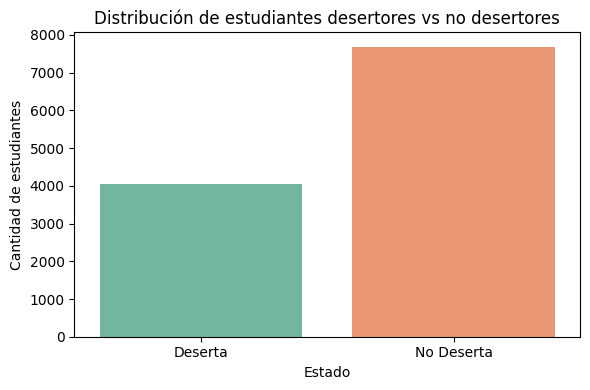

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Distribución de deserción
plt.figure(figsize=(6,4))
sns.countplot(x=metricas_completas["deserta"].map({0: "No Deserta", 1: "Deserta"}), palette="Set2")
plt.title("Distribución de estudiantes desertores vs no desertores")
plt.xlabel("Estado")
plt.ylabel("Cantidad de estudiantes")
plt.tight_layout()
plt.show()

En esta gráfica podemos observar que hay alrededor de 4000 estudiantes que desertan de su carrera comparado con aproximadamente 8000 estudiantes que no desertan si tomamos un ejemplo de 12000 estudiantes estamos hablando de que una tercera parte de estudiantes son los que desertan cada año por motivos "desconocidos".

/tmp/ipykernel_12609/207713636.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="deserta", y="promedio_calificaciones", data=metricas_completas, palette="Set2")


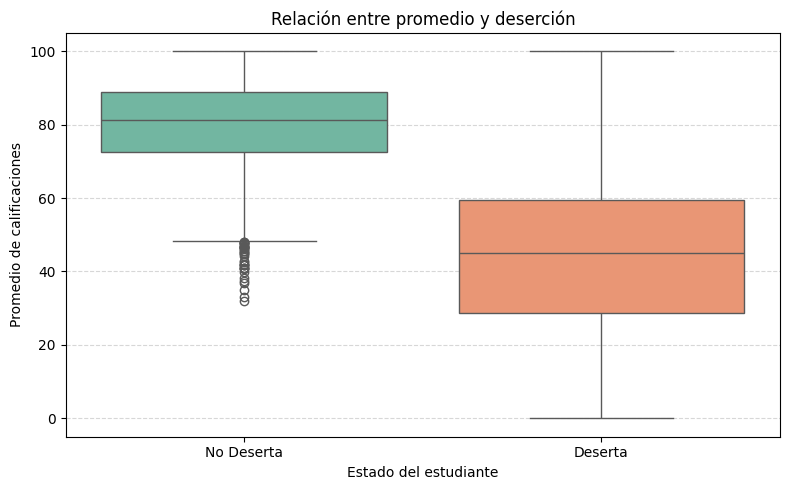

In [ ]:
# Relación entre promedio y deserción
plt.figure(figsize=(8,5))
sns.boxplot(x="deserta", y="promedio_calificaciones", data=metricas_completas, palette="Set2")
plt.xticks([0,1], ["No Deserta", "Deserta"])
plt.title("Relación entre promedio y deserción")
plt.xlabel("Estado del estudiante")
plt.ylabel("Promedio de calificaciones")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

En esta gráfica podemos observar que los estudiantes que desertan son los que tienen calificaciones no aprobatoria estando en un rango de 30-60 aproximadamente y los que no desertan tienen un rango de calificaciones aprobatorias con un rango aproximado de 75-90 , entonces con esta gráfica podemos concluir que una de las razones por las que desertan los alumnos es por tener calificaciones no aprobatorias.

/tmp/ipykernel_12609/1415768964.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="deserta", y="porcentaje_aprobadas", data=metricas_completas, palette="Set3")


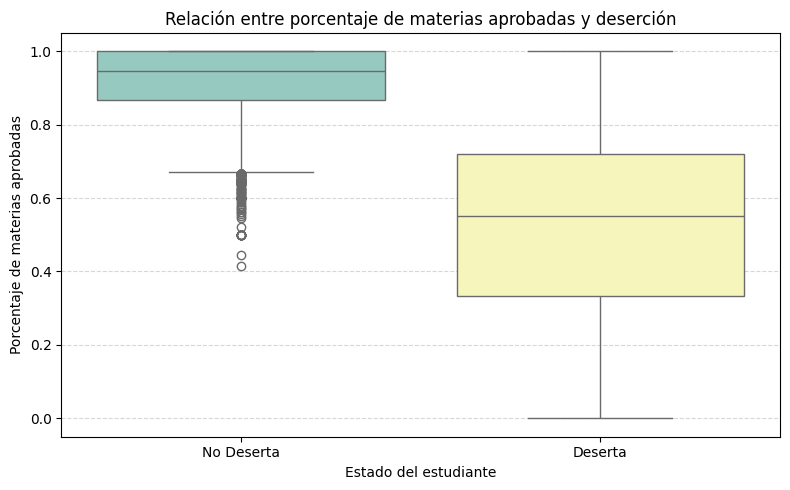

In [ ]:
# Porcentaje de materias aprobadas vs deserción
plt.figure(figsize=(8,5))
sns.boxplot(x="deserta", y="porcentaje_aprobadas", data=metricas_completas, palette="Set3")
plt.xticks([0,1], ["No Deserta", "Deserta"])
plt.title("Relación entre porcentaje de materias aprobadas y deserción")
plt.xlabel("Estado del estudiante")
plt.ylabel("Porcentaje de materias aprobadas")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Este gráfico va de la mano con el anterior ya que los estudiantes que no desertan tienen aprobado el 90% de sus materias y los desertores tienen aprobadas menos del 70% esto indicando que por eso tienen bajas calificaciones.

## Act
### Preguntas guía 
- ¿Cuál es tu conclusión final basada en tu análisis?
- Como puede tu equipo y organización/empresa aplicar tus descubrimientos?
- ¿Que pasos tomarán tu o los _stakeholders_ basado en tus descubrimientos? 
- ¿Hay datos adicionales que pudieras usar para expandir tus descubrimientos?
### Tareas clave 
- Practica la presentación de tu caso de estudio a un amigo o familiar
### Entregables
- Tus descubrimientos mas importantes basado en tu análisis 
- Una lista adicional de entregables que creas será útil incluir para exploración posterior
